# variation partion

+ **目的**：计算每个因素能解释多少菌群变化（variance explained），本notebook以计算宿主、天数、吃饭、刷牙等因素对口腔菌群变化的解释量为例
+ **方法**：菌群的distance作为因变量，metadata中因素的距离矩阵作为自变量，拟合线性模型，然后再用relaimpo包计算每个因素的 %response variance
+ **参考文献**：New Insights into the Intrinsic and Extrinsic Factors That Shape the Human Skin Microbiome. you can click [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6606800/) for the original text

In [2]:
library(relaimpo) # for variation partion
library(cluster) # for calculatting distance of metadata
library(ggplot2) # 

In [3]:
# read metadata
md<-read.csv('metadata.tsv',sep='\t',row.names= 1)
dim(md)

[1] 866  39

In [4]:
head(md[,c('Host_ID','Day','events','Eat','Brush','Sleep','Exercise')])
# 数据是不同天数、不同事件下三个宿主的口腔微生物

,Host_ID,Day,events,Eat,Brush,Sleep,Exercise
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
19122,MA,1,sleep,no,no,yes,no
19123,MA,1,,no,no,no,no
19124,MA,1,sleep,no,no,yes,no
19125,MA,1,,no,no,no,no
19126,MA,1,,no,no,no,no
19127,MA,1,,no,no,no,no


In [5]:
md['Sleep'] <- as.factor(md[,'Sleep'])
md['Eat'] <- as.factor(md[,'Eat'])
md['Exercise'] <- as.factor(md[,'Exercise'])
md['Brush'] <- as.factor(md[,'Brush'])
md['Host_ID'] <- as.factor(md[,'Host_ID'])

In [6]:
# read braycurtis-distance-matrix file
braycurtis_dis <- read.csv('braycurtis-distance-matrix.qza-unzip/data/distance-matrix.tsv',sep='\t',row.names=1)
colnames(braycurtis_dis) <- rownames(braycurtis_dis)
dim(braycurtis_dis)

[1] 599 599

In [7]:
head(braycurtis_dis)

,19336,19432,19499,19398,19394,19176,19356,19323,19181,19312,⋯,19927,19821,19985,20007,19868,19908,19260,19136,19814,19947
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
19336,0.0000000,0.5538582,0.6976107,0.5393655,0.4786526,0.5417156,0.5934195,0.5910693,0.4563259,0.4810027,⋯,0.5115550,0.5660008,0.6263220,0.4923619,0.5491579,0.4414414,0.4586761,0.5851939,0.6799843,0.5205640
19432,0.5538582,0.0000000,0.3975715,0.2906385,0.3309832,0.4766941,0.3063063,0.5174305,0.4422248,0.4911868,⋯,0.5182139,0.4567176,0.5252644,0.4363494,0.4038386,0.4508421,0.4943204,0.4296906,0.5001958,0.4770858
19499,0.6976107,0.3975715,0.0000000,0.3490012,0.4010967,0.5327066,0.3556600,0.5667842,0.5522914,0.4759107,⋯,0.5746181,0.5189973,0.5311398,0.5280063,0.4853114,0.4786526,0.5726596,0.5150803,0.5127301,0.4907951
19398,0.5393655,0.2906385,0.3490012,0.0000000,0.2667450,0.5056796,0.2781042,0.5558167,0.4719937,0.4857031,⋯,0.4727771,0.4516255,0.5084215,0.4300823,0.3893459,0.4191148,0.5111633,0.4853114,0.4998042,0.4226400
19394,0.4786526,0.3309832,0.4010967,0.2667450,0.0000000,0.3482178,0.2612613,0.3960047,0.4406580,0.3415590,⋯,0.3846455,0.3642773,0.3713278,0.2624363,0.2953388,0.3153153,0.3145319,0.4473169,0.4394830,0.2871132
19176,0.5417156,0.4766941,0.5327066,0.5056796,0.3482178,0.0000000,0.4089307,0.2902468,0.4296906,0.2784959,⋯,0.4696436,0.4277321,0.3936545,0.3313749,0.3748531,0.3807286,0.2800627,0.3352918,0.4363494,0.3180572


In [8]:
# read canberra distance-matrix file
canberra_dis <- read.csv('canberra-distance-matrix.qza-unzip/data/distance-matrix.tsv',sep='\t',row.names = 1)
colnames(canberra_dis) <- row.names(canberra_dis)
head(canberra_dis)

,19336,19432,19499,19398,19394,19176,19356,19323,19181,19312,⋯,19927,19821,19985,20007,19868,19908,19260,19136,19814,19947
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
19336,0.00000,109.9464,124.7135,122.53124,107.09942,92.75818,121.7982,89.18228,90.54437,80.14831,⋯,145.0691,101.2884,100.1384,109.8166,110.8916,107.6890,76.47990,109.24159,103.2956,90.66771
19432,109.94638,0.0000,120.4986,116.72963,108.86965,122.50503,112.9581,127.92019,133.98530,121.76566,⋯,164.0839,131.0742,131.5997,139.8592,135.5408,140.9497,121.25923,125.21562,128.7007,124.48176
19499,124.71352,120.4986,0.0000,105.77223,101.38133,139.49486,100.2456,146.51363,140.25169,133.29387,⋯,173.8975,143.0789,140.8497,158.3759,153.2253,141.1362,134.06638,158.47321,144.4153,135.26582
19398,122.53124,116.7296,105.7722,0.00000,92.72027,143.16624,108.3755,139.17204,140.32684,132.95512,⋯,163.8521,133.6279,133.9754,141.7553,146.3564,138.6005,132.12592,151.10240,125.4710,131.82034
19394,107.09942,108.8696,101.3813,92.72027,0.00000,138.03403,104.1767,125.12195,127.69631,123.59887,⋯,162.6378,124.8350,128.8533,133.0897,136.8427,130.4530,122.02841,142.46039,122.9281,122.05542
19176,92.75818,122.5050,139.4949,143.16624,138.03403,0.00000,135.7862,86.61319,118.13184,86.54682,⋯,157.6657,123.4370,117.6251,132.3621,135.0192,126.9663,82.85877,93.34749,122.1217,108.71984


In [9]:
#all(colnames(canberra_dis)==colnames(braycurtis_dis))

In [10]:
md <- md[row.names(braycurtis_dis),]
dim(md)

[1] 599  39

# all samples

In [11]:
# log-transform Bray-Curtis dissimilarities
bray_dis <- as.dist(braycurtis_dis)
bray_dis <- log(bray_dis)

In [12]:
# compute individual predictors's distances (Gower for nonnumeric and Euclidean for numeric)
day_dis <- daisy(md['Day'],metric = "euclidean")
brush_dis <- daisy(md['Brush'],metric = "gower")
sleep_dis <- daisy(md['Sleep'],metric = "gower")
eat_dis <- daisy(md['Eat'],metric = "gower")
exercise_dis <- daisy(md['Exercise'],metric = "gower")
host_dis <- daisy(md['Host_ID'],metric='gower')

In [13]:
#multiple regression on log-transformed Bray-Curtis dissimilarities
lm_fit <- lm(bray_dis ~ host_dis + day_dis + brush_dis + sleep_dis + eat_dis + exercise_dis)

In [14]:
summary(lm_fit)


Call:
lm(formula = bray_dis ~ host_dis + day_dis + brush_dis + sleep_dis + 
    eat_dis + exercise_dis)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.47503 -0.14272  0.00839  0.15395  0.88728 

Coefficients:
               Estimate Std. Error  t value Pr(>|t|)    
(Intercept)  -1.1550601  0.0012670 -911.656   <2e-16 ***
host_dis      0.2862573  0.0011657  245.574   <2e-16 ***
day_dis       0.0166295  0.0004057   40.991   <2e-16 ***
brush_dis    -0.0460004  0.0031225  -14.732   <2e-16 ***
sleep_dis     0.0432199  0.0016440   26.290   <2e-16 ***
eat_dis       0.1225875  0.0013596   90.165   <2e-16 ***
exercise_dis  0.0002275  0.0022971    0.099    0.921    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2329 on 179094 degrees of freedom
Multiple R-squared:  0.2854,	Adjusted R-squared:  0.2853 
F-statistic: 1.192e+04 on 6 and 179094 DF,  p-value: < 2.2e-16


In [15]:
cr <- calc.relimp(lm_fit,type='lmg')
cr

Response variable: bray_dis 
Total response variance: 0.07590439 
Analysis based on 179101 observations 

6 Regressors: 
host_dis day_dis brush_dis sleep_dis eat_dis exercise_dis 
Proportion of variance explained by model: 28.54%
Metrics are not normalized (rela=FALSE). 

Relative importance metrics: 

                      lmg
host_dis     2.423164e-01
day_dis      6.644623e-03
brush_dis    7.541151e-04
sleep_dis    2.045350e-03
eat_dis      3.354039e-02
exercise_dis 6.943311e-05

Average coefficients for different model sizes: 

                      1X         2Xs         3Xs          4Xs          5Xs
host_dis      0.28814816  0.28779238  0.28742671  0.287049861  0.286660494
day_dis       0.01648998  0.01650888  0.01653207  0.016559794  0.016592223
brush_dis    -0.03961309 -0.04039352 -0.04142904 -0.042713434 -0.044239772
sleep_dis     0.02942110  0.03226934  0.03507800  0.037842293  0.040557688
eat_dis       0.12606390  0.12533566  0.12462619  0.123933236  0.123254478
exercise_dis 

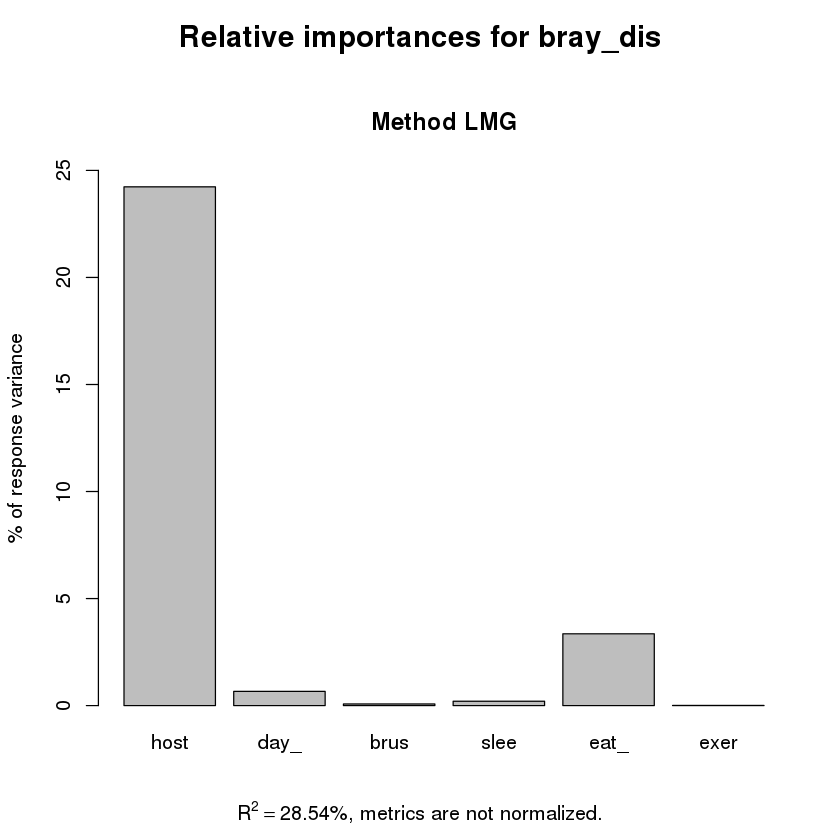

In [16]:
plot(cr)

In [17]:
# for plotting
res=as.data.frame(cr$lmg)
names(res)='effect_size'
res$effectsize<- round(res$effect_size,5)*100

res$events=c('host_id','day','brush','sleep','eat','exercise')

res$events=factor(res$events,levels=c('host_id','eat','brush','sleep','exercise','day')) # order for plot

res

,effect_size,effectsize,events
,<dbl>,<dbl>,<fct>
host_dis,2.423164e-01,24.232,host_id
day_dis,6.644623e-03,0.664,day
brush_dis,7.541151e-04,0.075,brush
sleep_dis,2.045350e-03,0.205,sleep
eat_dis,3.354039e-02,3.354,eat
exercise_dis,6.943311e-05,0.007,exercise


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


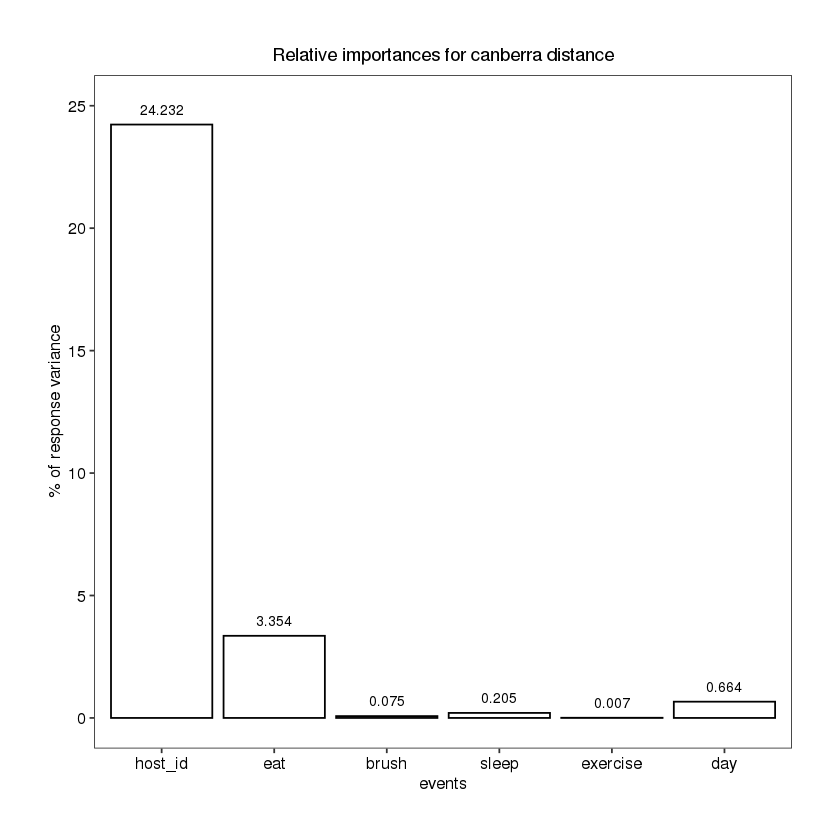

In [18]:
ggplot(data = res, aes(x = events, y =effectsize,fill='white')) + 
geom_bar(stat = "identity", position = 'dodge',colour = 'black')+ 
theme_bw()+
geom_text(aes(label = effectsize), position = position_dodge(0.9),vjust =-1, size = 3)+
labs(y = "% of response variance",title = "Relative importances for canberra distance")+
theme(axis.text.x = element_text(angle = 0, hjust = 0.5), 
        panel.grid = element_blank(), 
        axis.text = element_text(size = 10,colour = 'black'), 
        axis.title = element_text(size = 10),
        plot.title = element_text(size = 11,hjust = 0.5),
     plot.margin=unit(rep(2,4),'lines'))+ 
ylim(0,25)+guides(fill=FALSE)+scale_fill_manual(values="white")

**------end------**

后面的代码都是一样的,请忽略

In [20]:
# based on canberra distance
#换个distance做同样的计算

In [19]:
# log-transform canberra dissimilarities
canberra_dist<-as.dist(canberra_dis)
canberra_dist<-log(canberra_dist)

In [20]:
lm_fit <- lm(canberra_dist ~ host_dis+day_dis+ brush_dis + sleep_dis + eat_dis + exercise_dis)
lm_fit


Call:
lm(formula = canberra_dist ~ host_dis + day_dis + brush_dis + 
    sleep_dis + eat_dis + exercise_dis)

Coefficients:
 (Intercept)      host_dis       day_dis     brush_dis     sleep_dis  
    4.494387      0.285935      0.004748      0.032304     -0.008451  
     eat_dis  exercise_dis  
    0.134343      0.015065  


In [21]:
summary(lm_fit)


Call:
lm(formula = canberra_dist ~ host_dis + day_dis + brush_dis + 
    sleep_dis + eat_dis + exercise_dis)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.93237 -0.10780  0.00687  0.11481  0.60940 

Coefficients:
               Estimate Std. Error  t value Pr(>|t|)    
(Intercept)   4.4943873  0.0008886 5058.015  < 2e-16 ***
host_dis      0.2859348  0.0008175  349.765  < 2e-16 ***
day_dis       0.0047479  0.0002845   16.688  < 2e-16 ***
brush_dis     0.0323042  0.0021899   14.751  < 2e-16 ***
sleep_dis    -0.0084512  0.0011530   -7.330 2.31e-13 ***
eat_dis       0.1343426  0.0009535  140.893  < 2e-16 ***
exercise_dis  0.0150649  0.0016110    9.351  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1633 on 179094 degrees of freedom
Multiple R-squared:  0.4469,	Adjusted R-squared:  0.4469 
F-statistic: 2.412e+04 on 6 and 179094 DF,  p-value: < 2.2e-16


In [22]:
cr <- calc.relimp(lm_fit,type='lmg')
cr

Response variable: canberra_dist 
Total response variance: 0.04823474 
Analysis based on 179101 observations 

6 Regressors: 
host_dis day_dis brush_dis sleep_dis eat_dis exercise_dis 
Proportion of variance explained by model: 44.69%
Metrics are not normalized (rela=FALSE). 

Relative importance metrics: 

                      lmg
host_dis     0.3804415134
day_dis      0.0008304438
brush_dis    0.0005246182
sleep_dis    0.0004880501
eat_dis      0.0644471408
exercise_dis 0.0001456812

Average coefficients for different model sizes: 

                       1X          2Xs          3Xs          4Xs          5Xs
host_dis      0.287837478  0.287462171  0.287085011  0.286705239  0.286322092
day_dis       0.004589426  0.004612209  0.004639272  0.004670837  0.004707043
brush_dis     0.022972300  0.025455179  0.027626140  0.029488392  0.031046064
sleep_dis    -0.017631838 -0.015718354 -0.013838896 -0.011998247 -0.010200926
eat_dis       0.140260096  0.139133386  0.137981667  0.136801568  0.

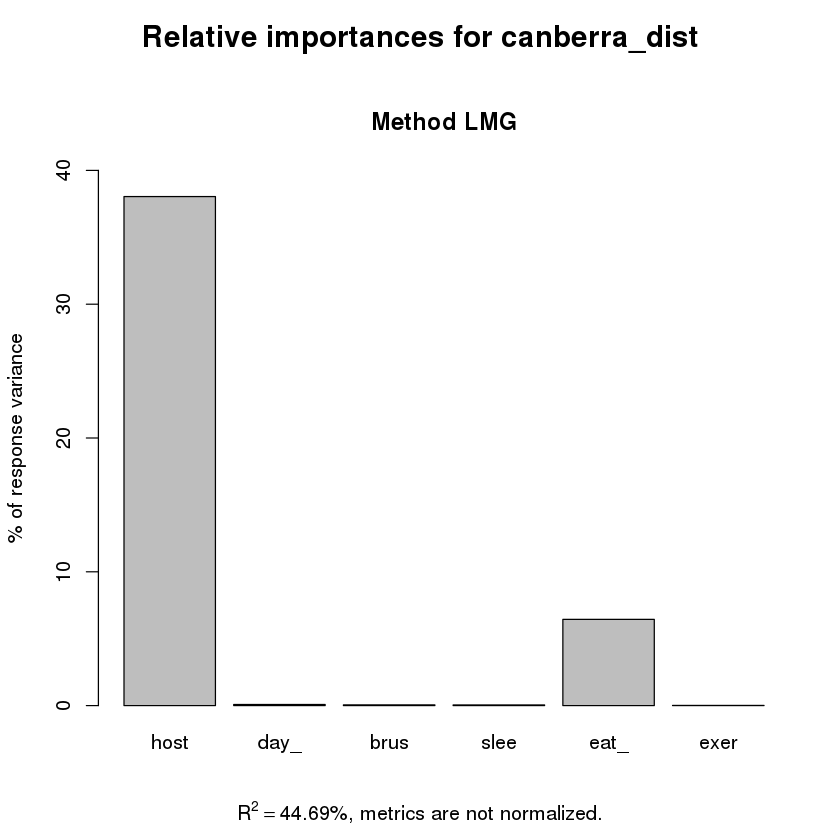

In [23]:
plot(cr)

In [24]:
unique(md$Host_ID)

[1] MA MO ME
Levels: MA ME MO MS

# MA

计算每个事间对每个宿主微生物变化的variance explained。

In [23]:
# filter metadata
MA_md<-md[which(md$Host_ID=='MA'),]
dim(MA_md)

[1] 207  39

In [24]:
# filter braycurtis-distance
bc_dis <- braycurtis_dis[rownames(MA_md),rownames(MA_md)]
bc_dis <- as.dist(bc_dis)
bc_dis <- log(bc_dis)

In [25]:
# filter canberra-distance
cbr_dis <- canberra_dis[rownames(MA_md),rownames(MA_md)] 
cbr_dis <- as.dist(cbr_dis)
cbr_dis <- log(cbr_dis)

In [26]:
# distance of predicters
day_dis <- daisy(MA_md['Day'],metric = "euclidean")
brush_dis <- daisy(MA_md['Brush'],metric = "gower")
sleep_dis <- daisy(MA_md['Sleep'],metric = "gower")
eat_dis <- daisy(MA_md['Eat'],metric = "gower")
exercise_dis <- daisy(MA_md['Exercise'],metric = "gower")

In [27]:
#multiple regression on log-transformed Bray-Curtis dissimilarities

lm_fit <- lm(bc_dis~day_dis+brush_dis+sleep_dis+eat_dis+exercise_dis)
lm_fit


Call:
lm(formula = bc_dis ~ day_dis + brush_dis + sleep_dis + eat_dis + 
    exercise_dis)

Coefficients:
 (Intercept)       day_dis     brush_dis     sleep_dis       eat_dis  
    -1.14043       0.01581      -0.04111       0.05198       0.21136  
exercise_dis  
    -0.03366  


In [28]:
cr <- calc.relimp(lm_fit,type='lmg')
cr

Response variable: bc_dis 
Total response variance: 0.09540374 
Analysis based on 21321 observations 

5 Regressors: 
day_dis brush_dis sleep_dis eat_dis exercise_dis 
Proportion of variance explained by model: 7.44%
Metrics are not normalized (rela=FALSE). 

Relative importance metrics: 

                      lmg
day_dis      0.0050714595
brush_dis    0.0003739067
sleep_dis    0.0028928835
eat_dis      0.0642564520
exercise_dis 0.0018527258

Average coefficients for different model sizes: 

                      1X         2Xs         3Xs         4Xs         5Xs
day_dis       0.01606061  0.01597975  0.01590777  0.01584879  0.01580643
brush_dis    -0.03029060 -0.03162354 -0.03382477 -0.03696237 -0.04110700
sleep_dis     0.03345195  0.03804146  0.04266411  0.04731200  0.05197738
eat_dis       0.20916348  0.20971604  0.21026019  0.21080455  0.21135728
exercise_dis -0.05564205 -0.05063974 -0.04527913 -0.03960604 -0.03366452

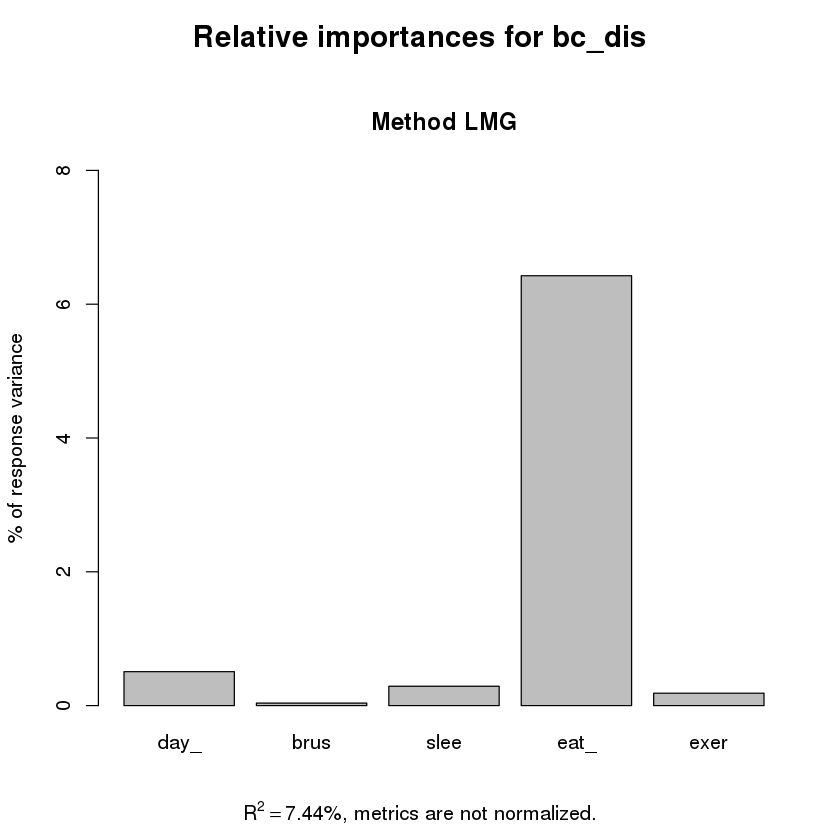

In [29]:
plot(cr)

In [30]:
#multiple regression on log-transformed canberra dissimilarities

lm_fit<-lm(cbr_dis~day_dis+brush_dis+sleep_dis+eat_dis+exercise_dis)
lm_fit


Call:
lm(formula = cbr_dis ~ day_dis + brush_dis + sleep_dis + eat_dis + 
    exercise_dis)

Coefficients:
 (Intercept)       day_dis     brush_dis     sleep_dis       eat_dis  
    4.422546      0.007077      0.105758      0.009741      0.237547  
exercise_dis  
    0.058631  


In [31]:
cr<-calc.relimp(lm_fit,type='lmg')
cr

Response variable: cbr_dis 
Total response variance: 0.03808703 
Analysis based on 21321 observations 

5 Regressors: 
day_dis brush_dis sleep_dis eat_dis exercise_dis 
Proportion of variance explained by model: 21.62%
Metrics are not normalized (rela=FALSE). 

Relative importance metrics: 

                      lmg
day_dis      0.0024811782
brush_dis    0.0071111588
sleep_dis    0.0003744157
eat_dis      0.2010967991
exercise_dis 0.0051794001

Average coefficients for different model sizes: 

                       1X          2Xs         3Xs         4Xs         5Xs
day_dis       0.007013815 0.0070166034 0.007025470 0.007044506 0.007077207
brush_dis     0.090059312 0.0961030936 0.100811379 0.104068424 0.105757564
sleep_dis    -0.002704744 0.0003023282 0.003385738 0.006535143 0.009740520
eat_dis       0.232354715 0.2337567109 0.235099983 0.236368707 0.237547090
exercise_dis  0.036895723 0.0420039387 0.047373975 0.052938346 0.058631070

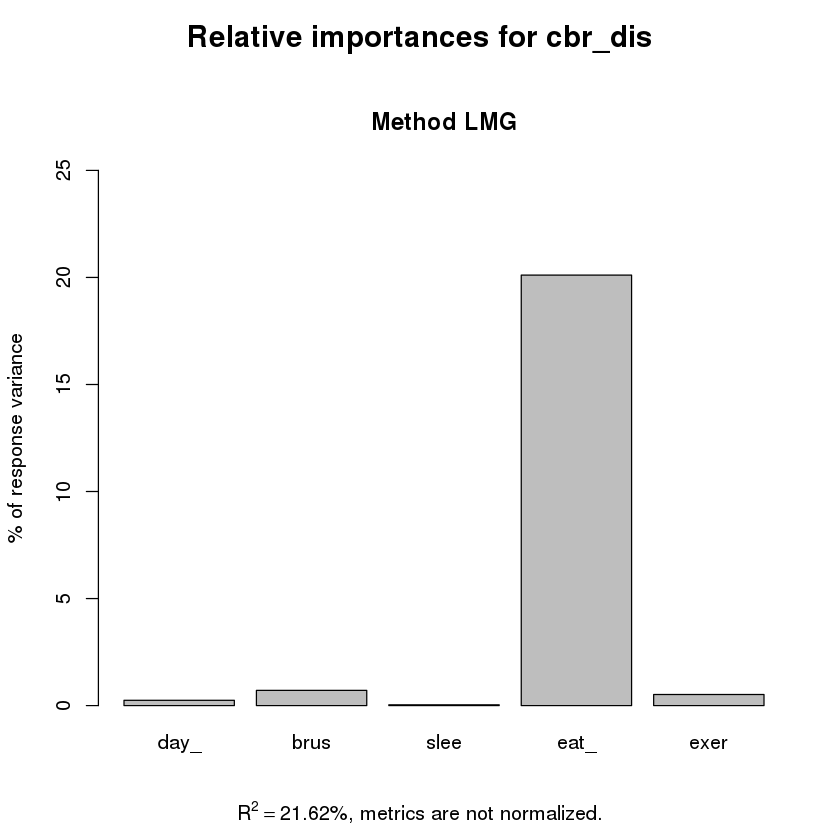

In [32]:
plot(cr)

# MO

In [33]:
# filter metadata
MO_md<-md[which(md$Host_ID=='MO'),]
dim(MO_md)

[1] 172  39

In [34]:
# filter bc distance
bc_dis <- braycurtis_dis[rownames(MO_md),rownames(MO_md)]  # filter distance matrix
bc_dis <- as.dist(bc_dis)
bc_dis <- log(bc_dis)

In [35]:
# filter canberra-distance
cbr_dis <- canberra_dis[rownames(MO_md),rownames(MO_md)] 
cbr_dis <- as.dist(cbr_dis)
cbr_dis <- log(cbr_dis)

In [36]:
# distance of predictors
day_dis<-daisy(MO_md['Day'],metric = "euclidean")
brush_dis<-daisy(MO_md['Brush'],metric = "gower")
sleep_dis<-daisy(MO_md['Sleep'],metric = "gower")
eat_dis<-daisy(MO_md['Eat'],metric = "gower")
exercise_dis<-daisy(MO_md['Exercise'],metric = "gower")

In [37]:
#multiple regression on log-transformed Bray-Curtis dissimilarities

lm_fit <- lm(bc_dis~day_dis+brush_dis+sleep_dis+eat_dis+exercise_dis)
lm_fit


Call:
lm(formula = bc_dis ~ day_dis + brush_dis + sleep_dis + eat_dis + 
    exercise_dis)

Coefficients:
 (Intercept)       day_dis     brush_dis     sleep_dis       eat_dis  
    -1.08442       0.01989      -0.03206       0.13482       0.06900  
exercise_dis  
    -0.04444  


In [38]:
cr<-calc.relimp(lm_fit,type='lmg')
cr

Response variable: bc_dis 
Total response variance: 0.06125465 
Analysis based on 14706 observations 

5 Regressors: 
day_dis brush_dis sleep_dis eat_dis exercise_dis 
Proportion of variance explained by model: 6.01%
Metrics are not normalized (rela=FALSE). 

Relative importance metrics: 

                      lmg
day_dis      0.0115159892
brush_dis    0.0005881668
sleep_dis    0.0301689046
eat_dis      0.0152763940
exercise_dis 0.0025885569

Average coefficients for different model sizes: 

                      1X         2Xs         3Xs          4Xs         5Xs
day_dis       0.02072583  0.02051906  0.02030891  0.020097171  0.01988530
brush_dis     0.07054732  0.04596870  0.02066460 -0.005349201 -0.03205902
sleep_dis     0.12535205  0.12775628  0.13013460  0.132488176  0.13481805
eat_dis       0.06317749  0.06470625  0.06618606  0.067616079  0.06899510
exercise_dis -0.06325495 -0.05878218 -0.05413295 -0.049340717 -0.04443755

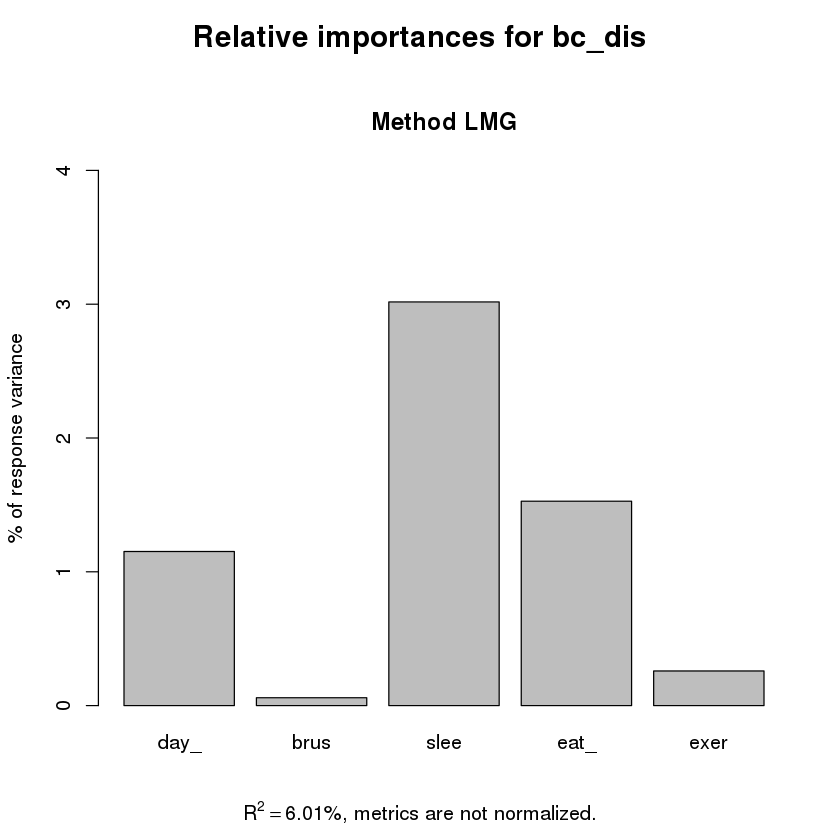

In [39]:
plot(cr)

In [40]:
MO_BC <- cr$lmg
MO_BC

day_dis    brush_dis    sleep_dis      eat_dis exercise_dis 
0.0115159892 0.0005881668 0.0301689046 0.0152763940 0.0025885569

In [41]:
#multiple regression on log-transformed canberra dissimilarities

lm_fit<-lm(cbr_dis~day_dis+brush_dis+sleep_dis+eat_dis+exercise_dis)
lm_fit


Call:
lm(formula = cbr_dis ~ day_dis + brush_dis + sleep_dis + eat_dis + 
    exercise_dis)

Coefficients:
 (Intercept)       day_dis     brush_dis     sleep_dis       eat_dis  
    4.618553      0.008810      0.007791      0.019703      0.059538  
exercise_dis  
   -0.005808  


In [42]:
# relative importance
cr<-calc.relimp(lm_fit,type='lmg')
cr

Response variable: cbr_dis 
Total response variance: 0.02072786 
Analysis based on 14706 observations 

5 Regressors: 
day_dis brush_dis sleep_dis eat_dis exercise_dis 
Proportion of variance explained by model: 4.49%
Metrics are not normalized (rela=FALSE). 

Relative importance metrics: 

                      lmg
day_dis      0.0067918578
brush_dis    0.0001174682
sleep_dis    0.0014989751
eat_dis      0.0361500572
exercise_dis 0.0003345229

Average coefficients for different model sizes: 

                       1X         2Xs          3Xs          4Xs          5Xs
day_dis       0.009334834  0.00920002  0.009067224  0.008937118  0.008810180
brush_dis     0.016771110  0.01583936  0.014051636  0.011378500  0.007790733
sleep_dis     0.013394366  0.01496041  0.016533936  0.018114755  0.019702602
eat_dis       0.058972018  0.05913717  0.059286828  0.059420632  0.059538071
exercise_dis -0.015296028 -0.01302716 -0.010678239 -0.008266299 -0.005807854

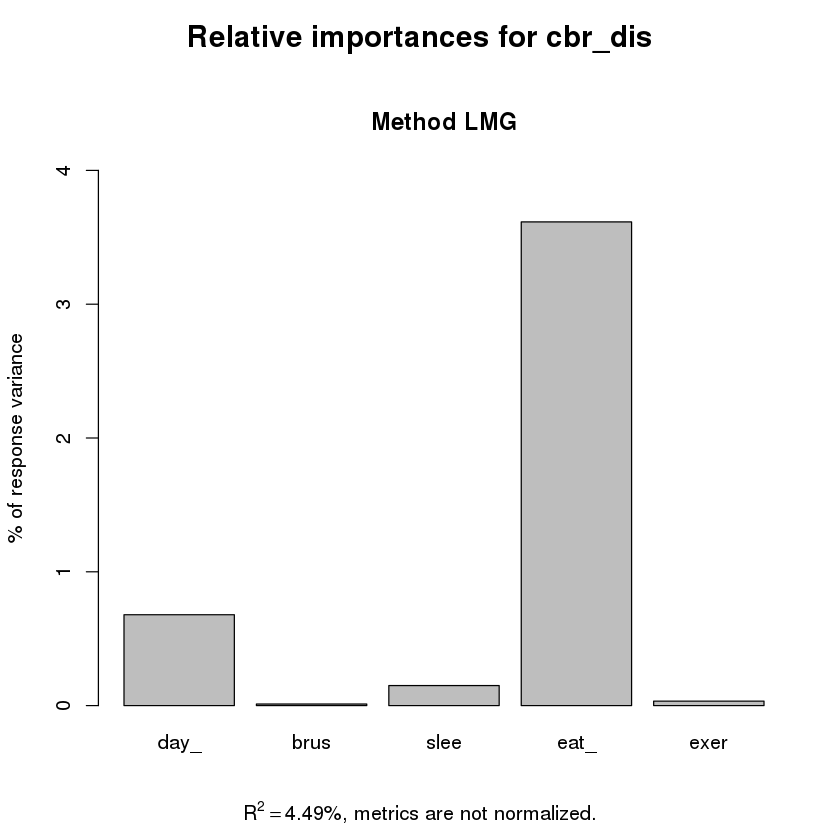

In [43]:
plot(cr)

# ME

In [44]:
ME_md<-md[which(md$Host_ID=='ME'),]
dim(ME_md)

[1] 220  39

In [45]:
# filter bc distance
bc_dis <- braycurtis_dis[rownames(ME_md),rownames(ME_md)]  
bc_dis <- as.dist(bc_dis)
bc_dis <- log(bc_dis)

In [46]:
# filter canberra-distance
cbr_dis <- canberra_dis[rownames(ME_md),rownames(ME_md)] 
cbr_dis <- as.dist(cbr_dis)
cbr_dis <- log(cbr_dis)

In [47]:
day_dis<-daisy(ME_md['Day'],metric = "euclidean")
brush_dis<-daisy(ME_md['Brush'],metric = "gower")
sleep_dis<-daisy(ME_md['Sleep'],metric = "gower")
eat_dis<-daisy(ME_md['Eat'],metric = "gower")
exercise_dis<-daisy(ME_md['Exercise'],metric = "gower")


In [48]:
#multiple regression on log-transformed Bray-Curtis dissimilarities

lm_fit <- lm(bc_dis~day_dis+brush_dis+sleep_dis+eat_dis+exercise_dis)
lm_fit


Call:
lm(formula = bc_dis ~ day_dis + brush_dis + sleep_dis + eat_dis + 
    exercise_dis)

Coefficients:
 (Intercept)       day_dis     brush_dis     sleep_dis       eat_dis  
  -1.2947001     0.0568373    -0.0544550     0.0006732     0.1311576  
exercise_dis  
   0.1039419  


In [49]:
# relative importance
cr<-calc.relimp(lm_fit,type='lmg')
cr

Response variable: bc_dis 
Total response variance: 0.08798594 
Analysis based on 24090 observations 

5 Regressors: 
day_dis brush_dis sleep_dis eat_dis exercise_dis 
Proportion of variance explained by model: 9.89%
Metrics are not normalized (rela=FALSE). 

Relative importance metrics: 

                      lmg
day_dis      0.0683239442
brush_dis    0.0015347378
sleep_dis    0.0001336385
eat_dis      0.0251730602
exercise_dis 0.0037734141

Average coefficients for different model sizes: 

                      1X         2Xs          3Xs          4Xs           5Xs
day_dis       0.05666319  0.05669233  0.056730590  0.056778692  0.0568372949
brush_dis    -0.04956848 -0.05033541 -0.051394445 -0.052761875 -0.0544550330
sleep_dis    -0.01942546 -0.01466740 -0.009731137 -0.004617402  0.0006731762
eat_dis       0.12711634  0.12802135  0.128993506  0.130037484  0.1311575921
exercise_dis  0.09212421  0.09488704  0.097775251  0.100792354  0.1039419120

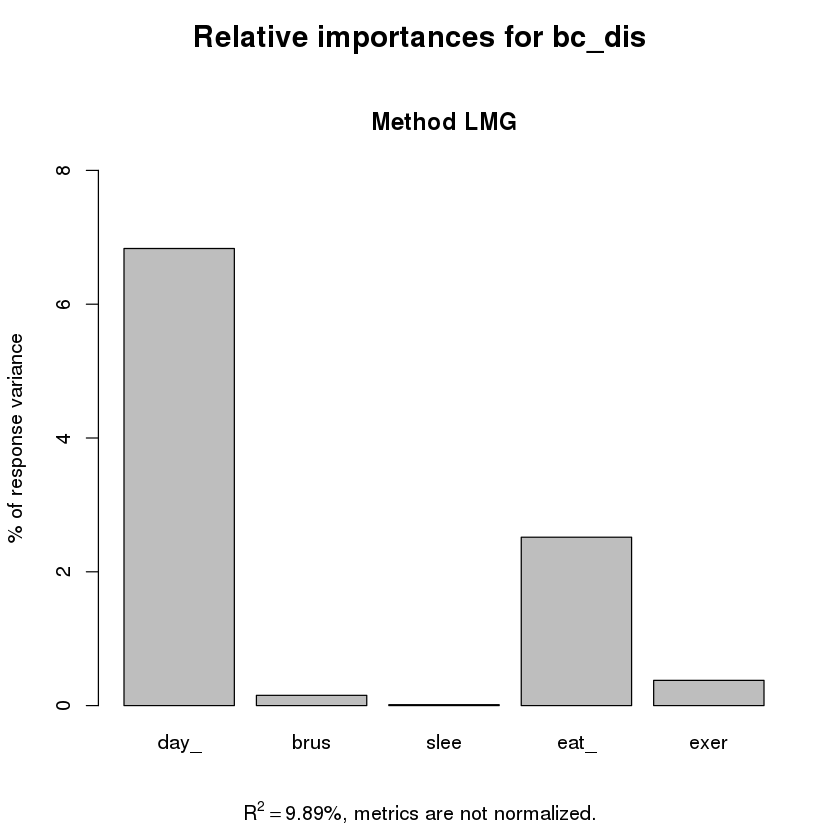

In [50]:
plot(cr)

In [51]:
#multiple regression on log-transformed canberra dissimilarities

lm_fit<-lm(cbr_dis~day_dis+brush_dis+sleep_dis+eat_dis+exercise_dis)
lm_fit


Call:
lm(formula = cbr_dis ~ day_dis + brush_dis + sleep_dis + eat_dis + 
    exercise_dis)

Coefficients:
 (Intercept)       day_dis     brush_dis     sleep_dis       eat_dis  
    4.438726      0.018935      0.012955     -0.018143      0.142349  
exercise_dis  
   -0.002176  


In [52]:
# relative importance
cr<-calc.relimp(lm_fit,type='lmg')
cr

Response variable: cbr_dis 
Total response variance: 0.03087846 
Analysis based on 24090 observations 

5 Regressors: 
day_dis brush_dis sleep_dis eat_dis exercise_dis 
Proportion of variance explained by model: 11.16%
Metrics are not normalized (rela=FALSE). 

Relative importance metrics: 

                      lmg
day_dis      0.0215919363
brush_dis    0.0004859178
sleep_dis    0.0015421800
eat_dis      0.0878477920
exercise_dis 0.0001014417

Average coefficients for different model sizes: 

                      1X         2Xs          3Xs          4Xs          5Xs
day_dis       0.01886967  0.01887706  0.018889962  0.018908961  0.018934549
brush_dis     0.01985530  0.01843321  0.016812627  0.014988289  0.012954587
sleep_dis    -0.02927591 -0.02673819 -0.024034181 -0.021167800 -0.018142955
eat_dis       0.14331570  0.14308310  0.142843537  0.142598441  0.142349129
exercise_dis -0.01337799 -0.01063875 -0.007857262 -0.005035591 -0.002175774

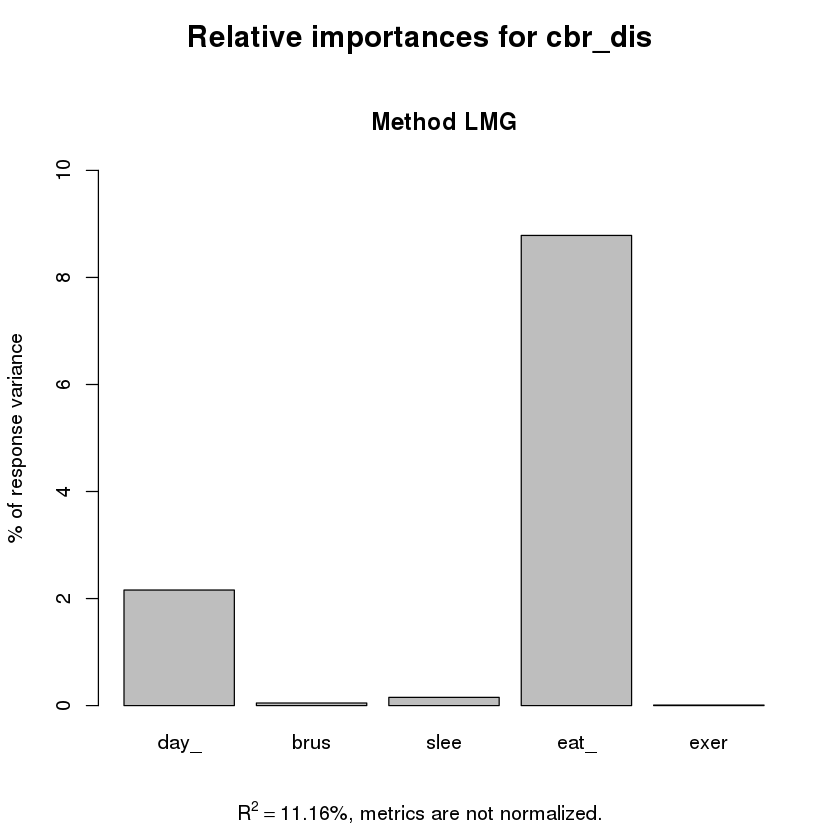

In [53]:
plot(cr)